# Predictive Modeling

Nicholas Greger

In [110]:
import math
from math import e

import pymc3 as pm

import numpy as np
from numpy import random

import pandas as pd
import pymc3 as pm

import scipy as sc
from scipy.stats import uniform, bernoulli, beta, expon, gamma, mannwhitneyu

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,5)

## Getting the Data

In order to be able to run the model, we'll need 3 statistics:
1. Starting pitcher Earned Run Average (ERA), deleniated for home and away.
2. Winning percent ratio
3. Team batting average

### Earned Running Average

In [2]:
pitching_2014h = pd.read_csv('2014_ERA_Home.csv')
pitching_2014a = pd.read_csv('2014_ERA_Away.csv')

pitching_2015h = pd.read_csv('2015_ERA_Home.csv')
pitching_2015a = pd.read_csv('2015_ERA_Away.csv')

pitching_2016h = pd.read_csv('2016_ERA_Home.csv')
pitching_2016a = pd.read_csv('2016_ERA_Away.csv')

pitching_2017h= pd.read_csv('2017_ERA_Home.csv')
pitching_2017a = pd.read_csv('2017_ERA_Away.csv')

In [3]:
ERA_2014 = pd.DataFrame()
ERA_2015 = pd.DataFrame()
ERA_2016 = pd.DataFrame()
ERA_2017 = pd.DataFrame()

ERA_2014['Team'] = pitching_2014h['Team']
ERA_2014['ERA_Home'] = pitching_2014h['ERA']
ERA_2014['ERA_Away'] = pitching_2014a['ERA']

ERA_2015['Team'] = pitching_2015h['Team']
ERA_2015['ERA_Home'] = pitching_2015h['ERA']
ERA_2015['ERA_Away'] = pitching_2015a['ERA']

ERA_2016['Team'] = pitching_2016h['Team']
ERA_2016['ERA_Home'] = pitching_2016h['ERA']
ERA_2016['ERA_Away'] = pitching_2016a['ERA']

ERA_2017['Team'] = pitching_2017h['Team']
ERA_2017['ERA_Home'] = pitching_2017h['ERA']
ERA_2017['ERA_Away'] = pitching_2017a['ERA']

In [4]:
# Replacing Team name with their abbreviations
era_list = [ERA_2014, ERA_2015, ERA_2016, ERA_2017]
team_names = ['Angels', 'Astros', 'Athletics', 'Blue Jays', 'Braves', 'Brewers', 'Cardinals', 'Cubs', 'Diamondbacks', 'Dodgers', 'Giants', 'Indians', 'Mariners', 'Marlins', 'Mets', 'Nationals', 'Orioles', 'Padres', 'Phillies', 'Pirates', 'Rangers', 'Rays', 'Red Sox', 'Reds', 'Rockies', 'Royals', 'Tigers', 'Twins', 'White Sox', 'Yankees']
team_abvr = ['LAA', 'HOU', 'OAK', 'TOR', 'ATL', 'MIL', 'STL', 'CHC', 'ARI', 'LAD', 'SFG', 'CLE', 'SEA', 'MIA', 'NYM', 'WSN', 'BAL', 'SDP', 'PHI', 'PIT', 'TEX', 'TBR', 'BOS', 'CIN', 'COL', 'KCR', 'DET', 'MIN', 'CHW', 'NYY']

for dataframe in era_list:
    dataframe.replace(team_names, team_abvr, inplace=True)

In [5]:
for df in era_list:
    df.sort_values('Team', inplace=True)
ERA_2014 = ERA_2014.reset_index(drop=True)
ERA_2015 = ERA_2015.reset_index(drop=True)
ERA_2016 = ERA_2016.reset_index(drop=True)
ERA_2017 = ERA_2017.reset_index(drop=True)

In [6]:
ERA_2017

,Team,ERA_Home,ERA_Away
0,ARI,3.79,3.55
1,ATL,4.82,4.62
2,BAL,4.60,5.38
3,BOS,3.70,3.77
4,CHC,4.12,3.78
5,CHW,4.40,5.18
6,CIN,4.89,5.47
7,CLE,3.19,3.43
8,COL,4.93,4.09
9,DET,5.38,5.34


### Win Percent Ratio

In [7]:
standings_2014 = pd.read_csv('2014_standings.csv')
standings_2015 = pd.read_csv('2015_standings.csv')
standings_2016 = pd.read_csv('2016_standings.csv')
standings_2017 = pd.read_csv('2017_standings.csv')

In [8]:
wl_2014 = standings_2014[['Tm', 'W-L%']]
wl_2015 = standings_2015[['Tm', 'W-L%']]
wl_2016 = standings_2016[['Tm', 'W-L%']]
wl_2017 = standings_2017[['Tm', 'W-L%']]

wl_2014.sort_values('Tm', inplace=True)
wl_2015.sort_values('Tm', inplace=True)
wl_2016.sort_values('Tm', inplace=True)
wl_2017.sort_values('Tm', inplace=True)


wl_2014 = wl_2014.reset_index(drop=True)
wl_2015 = wl_2015.reset_index(drop=True)
wl_2016 = wl_2016.reset_index(drop=True)
wl_2017 = wl_2017.reset_index(drop=True)

wl_2014

C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyW

,Tm,W-L%
0,ARI,0.395
1,ATL,0.488
2,Avg,0.500
3,BAL,0.593
4,BOS,0.438
5,CHC,0.451
6,CHW,0.451
7,CIN,0.469
8,CLE,0.525
9,COL,0.407


### Batting Average

In [9]:
batting_2014 = pd.read_csv('2014_batting.csv')
batting_2015 = pd.read_csv('2015_batting.csv')
batting_2016 = pd.read_csv('2016_batting.csv')
batting_2017 = pd.read_csv('2017_batting.csv')

In [10]:
batting_average_2014 = batting_2014[['Tm', 'BA']]
batting_average_2015 = batting_2015[['Tm', 'BA']]
batting_average_2016 = batting_2016[['Tm', 'BA']]
batting_average_2017 = batting_2017[['Tm', 'BA']]

batting_average_2014

,Tm,BA
0,ARI,0.248
1,ATL,0.241
2,BAL,0.256
3,BOS,0.244
4,CHC,0.239
5,CHW,0.253
6,CIN,0.238
7,CLE,0.253
8,COL,0.276
9,DET,0.277


### Combined

In [11]:
data_2014 = pd.DataFrame()
data_2015 = pd.DataFrame()
data_2016 = pd.DataFrame()
data_2017 = pd.DataFrame()

data_2014[['Team', 'ERA_Home', 'ERA_Away']] = ERA_2014[['Team', 'ERA_Home', 'ERA_Away']]
data_2014['W/L%'] = wl_2014['W-L%']
data_2014['BA'] = batting_average_2014['BA']

data_2015[['Team', 'ERA_Home', 'ERA_Away']] = ERA_2015[['Team', 'ERA_Home', 'ERA_Away']]
data_2015['W/L%'] = wl_2015['W-L%']
data_2015['BA'] = batting_average_2015['BA']

data_2016[['Team', 'ERA_Home', 'ERA_Away']] = ERA_2016[['Team', 'ERA_Home', 'ERA_Away']]
data_2016['W/L%'] = wl_2016['W-L%']
data_2016['BA'] = batting_average_2016['BA']

data_2017[['Team', 'ERA_Home', 'ERA_Away']] = ERA_2017[['Team', 'ERA_Home', 'ERA_Away']]
data_2017['W/L%'] = wl_2017['W-L%']
data_2017['BA'] = batting_average_2017['BA']

data_2014

,Team,ERA_Home,ERA_Away,W/L%,BA
0,ARI,4.31,4.20,0.395,0.248
1,ATL,3.13,3.65,0.488,0.241
2,BAL,3.22,3.66,0.500,0.256
3,BOS,4.06,3.96,0.593,0.244
4,CHC,3.47,4.41,0.438,0.239
5,CHW,4.32,4.27,0.451,0.253
6,CIN,3.27,3.92,0.451,0.238
7,CLE,3.38,3.78,0.469,0.253
8,COL,5.05,4.65,0.525,0.276
9,DET,4.17,3.85,0.407,0.277


In [12]:
data_2014.sort_values("Team")

,Team,ERA_Home,ERA_Away,W/L%,BA
0,ARI,4.31,4.20,0.395,0.248
1,ATL,3.13,3.65,0.488,0.241
2,BAL,3.22,3.66,0.500,0.256
3,BOS,4.06,3.96,0.593,0.244
4,CHC,3.47,4.41,0.438,0.239
5,CHW,4.32,4.27,0.451,0.253
6,CIN,3.27,3.92,0.451,0.238
7,CLE,3.38,3.78,0.469,0.253
8,COL,5.05,4.65,0.525,0.276
9,DET,4.17,3.85,0.407,0.277


### Predicting Astros's 2017 Season Values Using Linear Regression

In [185]:
data_2017.loc[10]
#HOU_Stats_2016 = data_2016.loc[10]
 #HOU_Stats_2017 = data_2017.loc[10]


Team          HOU
ERA_Home     3.65
ERA_Away     4.61
W/L%        0.395
BA          0.282
Name: 10, dtype: object

### Games

In [13]:
from pybaseball import schedule_and_record

HOU_2014_ = schedule_and_record(2014, "HOU")
HOU_2015_ = schedule_and_record(2015, "HOU")
HOU_2016_ = schedule_and_record(2016, "HOU")
HOU_2017_ = schedule_and_record(2017, "HOU")

In [28]:
HOU_2014 = HOU_2014_
HOU_2015 = HOU_2015_
HOU_2016 = HOU_2016_
HOU_2017 = HOU_2017_

In [29]:
schedules = [HOU_2014, HOU_2015, HOU_2016, HOU_2017]

HOU_2014 = HOU_2014[['Home_Away', 'Opp', 'W/L']]
HOU_2015 = HOU_2015[['Home_Away', 'Opp', 'W/L']]
HOU_2016 = HOU_2016[['Home_Away', 'Opp', 'W/L']]
HOU_2017 = HOU_2017[['Home_Away', 'Opp', 'W/L']]

HOU_2014.loc[HOU_2014['Home_Away'] == 'Home', 'is_home'] = 1
HOU_2014.loc[HOU_2014['Home_Away'] != 'Home', 'is_home'] = 0

HOU_2015.loc[HOU_2015['Home_Away'] == 'Home', 'is_home'] = 1
HOU_2015.loc[HOU_2015['Home_Away'] != 'Home', 'is_home'] = 0

HOU_2016.loc[HOU_2016['Home_Away'] == 'Home', 'is_home'] = 1
HOU_2016.loc[HOU_2016['Home_Away'] != 'Home', 'is_home'] = 0

HOU_2017.loc[HOU_2017['Home_Away'] == 'Home', 'is_home'] = 1
HOU_2017.loc[HOU_2017['Home_Away'] != 'Home', 'is_home'] = 0

idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
tm_abv = ["ARI", "ATL", "BAL", "BOS", "CHC", "CHW", "CIN", "CLE", "COL", "DET", "HOU", "KCR", "LAA", "LAD", "MIA", "MIL", "MIN", "NYM", "NYY", "OAK", "PHI", "PIT", "SDP", "SEA", "SFG", "STL", "TBR", "TEX", "TOR", "WSN"]
  
HOU_2014['Opp'].replace(tm_abv, idx, inplace=True)
HOU_2015['Opp'].replace(tm_abv, idx, inplace=True)
HOU_2016['Opp'].replace(tm_abv, idx, inplace=True)
HOU_2017['Opp'].replace(tm_abv, idx, inplace=True)

In [16]:
HOU_2015.head()

,Home_Away,Opp,W/L,is_home,Opp_as_idx
153,Home,12,L,1.0,None
154,Home,27,L,1.0,None
155,Home,27,W,1.0,None
156,Home,27,W,1.0,None
157,@,23,W,0.0,None
158,@,23,L,0.0,None
159,@,23,W,0.0,None
160,@,0,W,0.0,None
161,@,0,W,0.0,None
162,@,0,L,0.0,None


In [17]:
data_2 = data_2014[['Team', 'ERA_Home']]
data_2 = data_2.reset_index(drop=True)

data_2.at[10, 'ERA_Home']

4.04

# The Model

## Initializing Hyperparameters

In [18]:
def Initialize_Variables(data,
                         team,
                         game_opponents,
                         is_home,
                         a_i = 2,
                         delta_zero = 0,
                         delta_one = 2,
                         m_0 = 10):
    """Initializes variables in the model in order to calculate the values using Gibbs
    
    
    """
        
    winning_ratio_opposition = data[['W/L%']]
    batting_average_opposition = data[['BA']]
    era_home_opposition = data[['ERA_Home']]
    era_away_opposition = data[['ERA_Away']]
    
    winning_ratio_team = data.loc[team].values[3]
    batting_average_team = data.loc[team].values[4]
    era_home = data.loc[team].values[1]
    era_away = data.loc[team].values[2] 
    
    alpha_s = [] # Ratio of home vs. away winning percentages
    beta_s = [] # Ratio of home vs. away batting averages
    gamma_s = [] # Ratio of away vs home ERAs
    lambda_s = [] # Relative team strength, in the perspective of team
    
    i = 0
    
    for team in game_opponents:
        r_1 = np.random.uniform(0, a_i)
        r_2 = np.random.uniform(0, a_i)
        r_3 = np.random.uniform(0, a_i)
        
        winning_ratio_opp = winning_ratio_opposition.loc[team].values[0]
        batting_average_opp = batting_average_opposition.loc[team].values[0]
        era_home_opp = era_home_opposition.loc[team].values[0]
        era_away_opp = era_away_opposition.loc[team].values[0]
        
        if (is_home[i] == 1):
            alpha_s.append(winning_ratio_team/winning_ratio_opp) 
            beta_s.append(batting_average_team/batting_average_opp)
            gamma_s.append(era_away_opp/era_home)
            lambda_s.append(alpha_s[i]**r_1 * beta_s[i]**r_2 * gamma_s[i]**r_3)
            
        else:
            alpha_s.append(winning_ratio_opp/winning_ratio_team)
            beta_s.append(batting_average_opp/batting_average_team)
            gamma_s.append(era_home/era_home_opp)
            lambda_s.append((1/alpha_s[i])**r_1 * (1/beta_s[i])**r_2 * (1/gamma_s[i])**r_3)
        i += 1
        
    return lambda_s

### A Look at Relative Advantage (λ)

As the function calculates the relative advantage a team has throughout their season, lets look at the Astros' relative advantage over their opponents. When $λ > 1$, that means that the team has an advantage. When $λ < 1$, the team has a disadvantage.

In [30]:
# Plotting Astros Advantage for 162 Games, for 4 years
is_home_2014 = HOU_2014['is_home'].values
is_home_2015 = HOU_2015['is_home'].values
is_home_2016 = HOU_2016['is_home'].values
is_home_2017 = HOU_2017['is_home'].values

lambda_s_2014 = Initialize_Variables(data = data_2014, team = 10, game_opponents = HOU_2014['Opp'], is_home = is_home_2014)
lambda_s_2015 = Initialize_Variables(data = data_2015, team = 10, game_opponents = HOU_2015['Opp'], is_home = is_home_2015)
lambda_s_2016 = Initialize_Variables(data = data_2016, team = 10, game_opponents = HOU_2016['Opp'], is_home = is_home_2016)
lambda_s_2017 = Initialize_Variables(data = data_2017, team = 10, game_opponents = HOU_2017['Opp'], is_home = is_home_2017)

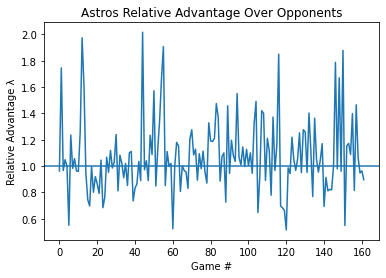

In [31]:
plt.plot(lambda_s_2017)
plt.axhline(1)

plt.xlabel("Game #")
plt.ylabel("Relative Advantage λ")

plt.title("Astros Relative Advantage Over Opponents")
plt.show()

As we can see, the advantage varies significantly. This can be attributed to the home vs. away game differences has on ERA, which is variable in this volatility. 

Let's try another team. The Boston Red Sox

In [41]:
# Getting appropriate stats and cleaning
BOS_2017 = schedule_and_record(2017, "BOS")

BOS_2017 = BOS_2017[['Home_Away', 'Opp', 'W/L']] # Getting only necessary columns.

BOS_2017.loc[BOS_2017['Home_Away'] == 'Home', 'is_home'] = 1 # Bool as to whether the team plays home or away
BOS_2017.loc[BOS_2017['Home_Away'] != 'Home', 'is_home'] = 0
is_home_BOS_2017 = BOS_2017['is_home'].values

BOS_2017['Opp'].replace(tm_abv, idx, inplace=True) # Replacing team abreveations as numbers

lambda_s_BOS_2017 = Initialize_Variables(data = data_2017, team = 3, game_opponents = BOS_2017['Opp'], is_home = is_home_BOS_2017)

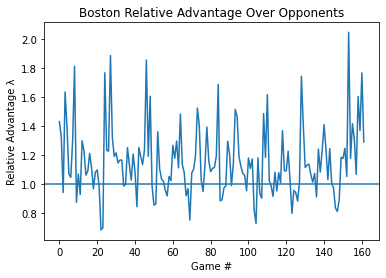

In [42]:
plt.plot(lambda_s_BOS_2017)
plt.axhline(1)

plt.xlabel("Game #")
plt.ylabel("Relative Advantage λ")

plt.title("Boston Relative Advantage Over Opponents")
plt.show()

The Red Sox usually has an advantage over other teams. This makes sense when in context of their performance as they are high performers, and have one the World Series twice in the past couple of years, 2018 and 2013.

The Detroit Tigers where had one of the lowest Win/Loss Percentages. Let's look at their advantage.

In [43]:
DET_2017 = schedule_and_record(2017, "DET")

DET_2017 = DET_2017[['Home_Away', 'Opp', 'W/L']] # Getting only necessary columns.

DET_2017.loc[BOS_2017['Home_Away'] == 'Home', 'is_home'] = 1 # Bool as to whether the team plays home or away
DET_2017.loc[BOS_2017['Home_Away'] != 'Home', 'is_home'] = 0
is_home_DET_2017 = BOS_2017['is_home'].values

DET_2017['Opp'].replace(tm_abv, idx, inplace=True) # Replacing team abreveations as numbers

lambda_s_DET_2017 = Initialize_Variables(data = data_2017, team = 9, game_opponents = DET_2017['Opp'], is_home = is_home_DET_2017)

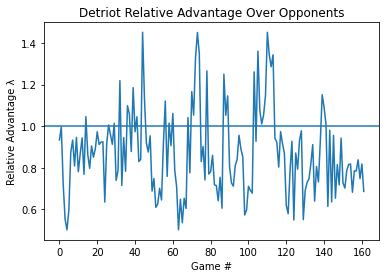

In [44]:
plt.plot(lambda_s_DET_2017)
plt.axhline(1)

plt.xlabel("Game #")
plt.ylabel("Relative Advantage λ")

plt.title("Detriot Relative Advantage Over Opponents")
plt.show()

As you can see, their AoP is nearly always less than 1 barring some instances.

### Astros AoP Predicted

While lambda is not part of the model, we find that it is still important to ask the question as to whether the Sign-Stealing-Scandal helped them. Although we are unable to directly create a test which tests that, we are under the assumption that sign stealing did help their statistics. Therefore, we propose a hypothesis test where the null-hypothesis $H_0$ is that difference between the 2017 predicted advantages and the 2017 actual advantages is of no significance. The alternative hypothesis $H_1$ is that difference is significant.

In [106]:
pred = [3.247, 4.87, 0.4947, 0.2513] # Astros 2017 predicted values with simple linear regression
act = [3.65, 4.61, 0.395, 0.282]
data_2017.loc[10].replace(act, pred)

Team           HOU
ERA_Home     3.247
ERA_Away      4.87
W/L%        0.4947
BA          0.2513
Name: 10, dtype: object

In [107]:
lambda_s_2017_pred = Initialize_Variables(data = data_2017, team = 3, game_opponents = HOU_2017['Opp'], is_home = is_home_2017)

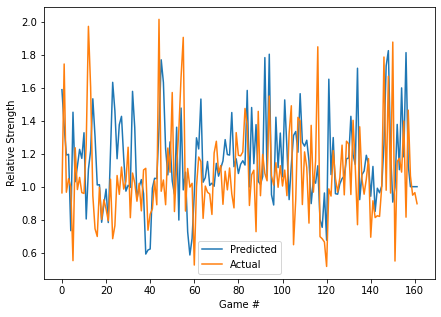

In [111]:
plt.plot(lambda_s_2017_pred, label= "Predicted")
plt.plot(lambda_s_2017, label = "Actual")
plt.xlabel("Game #")
plt.ylabel("Relative Strength")
plt.legend()
plt.show()

In [109]:
# Mann-Whitney Test
p = sc.stats.mannwhitneyu(lambda_s_2017, lambda_s_2017_pred)
print("Mann-Whitney P-Score:", p[1])

Mann-Whitney P-Score: 0.00026953618017152057


As $p < 0.01$, $p = 0.0003$, we are able to reject the null-hypothesis and are able to determine that the stats the Astros produced in the 2017 season is very unlikely to occur again, given their performance at that time.

## Gibbs Sampling NOTE: WILL REWRITE CODE

In order to generate accurate priors, we need to use a Gibbs sampler to sample from the conditional densitiy. The priors are then determined as the point of which the algorithm converges. 

### Posterior Density

$$p[\cdot | \cdot] \propto \left(\prod_{s=t_0}^{t-1} B(m\lambda_s\delta, m)p_s^{x_s+m\lambda_s\delta-1}(1-p_s)^{m-x_s}\right)e^{\frac{-m}{m_0}}$$

### $$P_s$$

$$ p_s \sim beta(m\lambda_s\delta, m)$$

Calculating $p_s$ is simpler than the rest of the densities as $p_s$ is simply calculated using the beta function. 

In [54]:
def Calculate_P(m, lambda_s, delta):
    with pm.Model() as model:
        phi = pm.Uniform('phi', lower=)

### $$ m $$


$$P[m | \cdot	] \propto e^{\frac{-m}{m_0}}\prod_{s = t_0}^{t-1}B(m\lambda_s\delta, m)p_s^{m\lambda_s\delta}(1 - p_s)^m$$ where $B(a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}$

In [76]:
# Used in the Gibbs Sampler for M
def B(a, b):
    return sc.special.gamma(a + b)/(sc.special.gamma(a)*sc.special.gamma(b))

In [99]:
def Calculate_M(lambda_s, p_s, delta, m_0, N = 10000):
    """
    Conditional Density for m
    returns: 
        m
    """
    m = sc.stats.expon.pdf(m_0)
    m_samples = []
    for samples in range(N):
        for lambda_t, p_t in zip(lambda_s, p_s):
            a = m*lambda_t*delta
            m_sampled = B(a, m) * (p_t**(a)) *((1-p_t)**m)
        m_samples.append(m_sampled)
        m = np.prod(m_samples)
            
    return m

### $$\delta, r_i$$

$$P[\delta | \cdot	] \propto \prod_{s=t_0}^{t-1} \frac{\Gamma(m\lambda_s\delta+m)}{\Gamma(m\lambda_s\delta)}p_s^{m\lambda_s\delta} $$

In [69]:
def Calculate_Delta(lambda_s,
                    p_s,
                    m,
                    delta_zero,
                    delta_one,
                    N = 10000):
    """
    Calculates delta using Metropolis-within-Gibbs
    returns:
        delta
    """
    
    delta_samples = [] # All samples received
    
    delta = np.random.uniform(delta_zero, delta_one)
    for n_iter in range(N):
        for lambda_t, p_t in zip(lambda_s, p_s):
            delta_sampled = sc.special.gamma(m*lambda_t*delta+m)/sc.special.gamma(m*lambda_t*delta)*p_t**(m*lambda_t*delta)
            delta_samples.append(delta_sampled)
            delta = np.prod(delta_samples)
    return delta_samples

$$P[r | \cdot	 ] \propto \prod_{s=t_0}^{t-1} \frac{\Gamma(m\lambda_s\delta+m)}{\Gamma(m\lambda_s\delta)}p_s^{m\lambda_s\delta} $$

In [ ]:
def Calculate_R(lambda_s,
                    p_s,
                    m,
                    a_i,
                    delta, 
                    N = 10000):
    """
    Calculates r_i using Metropolis-within-Gibbs
    returns:
        r
    """
    r_totals
    r_samples = [] # All samples received
    
    r = np.random.uniform(0, a_i)
    for n_iter in range(N):
        for lambda_t, p_t in zip(lambda_s, p_s):
            r_sampled = sc.special.gamma(m*lambda_t*delta+m)/sc.special.gamma(m*lambda_t*delta)*p_t**(m*lambda_t*delta)
            r_samples.append(r_sampled)
            r = np.prod(r_samples)
    return r_samples

### Running the Gibbs Sampler

In [86]:
m_0 = 10
m = sc.stats.expon.pdf(m_0)

delta_0 = 0
delta_1 = 2
delta = np.random.uniform(delta_0, delta_1)

m

4.5399929762484854e-05

In [70]:
p_s = Calculate_P(m = m, lambda_s = lambda_s_2017, delta = delta)

In [100]:
m = Calculate_M(lambda_s = lambda_s_2017,
                p_s = p_s,
                m_0 = 10,
                delta = delta,
                N = 162)

In [101]:
m

nan

## Predicting Games

In [25]:
def PredictWinners(m, lambda_s, delta, m, p_s, games):
    for i in range(games):
        